In [53]:
import os
import sys
import numpy as np
import pandas as pd
import plotly.express as px

# pd.set_option('display.max_columns', 300)
# pd.set_option('display.max_rows', 300)
# pd.set_option('display.max_colwidth', 5000)

In [55]:
FEATURE_DIR_NAME = '../data/features/'
RAW_DATA_DIR_NAME = '../data/raw/'

In [56]:
sorted(os.listdir(FEATURE_DIR_NAME))

['.DS_Store',
 '048_066.csv',
 '202006006BK',
 '20200602BK',
 '20200605BK',
 'X_test.pkl',
 'X_train.pkl',
 'camaro031_takapy_lgb_0601_2333.csv',
 'camaro_spectrum.pkl',
 'cavity_df.pkl',
 'chip_dic.pkl',
 'lgb_0602_2228_submission.csv',
 'lgb_0602_2318_submission.csv',
 'lgb_StratifiedKFold_06061135_submission.csv',
 'lgb_StratifiedKFold_06061143_submission.csv',
 'pseudo_labeling_048_066.pkl',
 'pseudo_labeling_camaro031_takapy_lgb_0601_2333.pkl',
 'pseudo_labeling_lgb_StratifiedKFold_06061135.pkl',
 'spectrum_peak_fwhm_df.pkl',
 'tsfresh_df.pkl',
 'wave_umap_tsne.pkl',
 'wave_umap_tsne_10-5d.pkl',
 'y_train.pkl']

In [57]:
# label_df = pd.read_csv(FEATURE_DIR_NAME + '048_066.csv')
label_df = pd.read_csv(FEATURE_DIR_NAME + 'lgb_StratifiedKFold_06061143_submission.csv')
# label_df = pd.read_csv(FEATURE_DIR_NAME + 'lgb_0602_2228_submission.csv')
# label_df = pd.read_csv(FEATURE_DIR_NAME + 'lgb_0602_2318_submission.csv')

In [58]:
display(label_df.head(), label_df.shape)

,target
0,0.002790
1,0.000671
2,0.000450
3,0.000024
4,0.000626


(6952, 1)

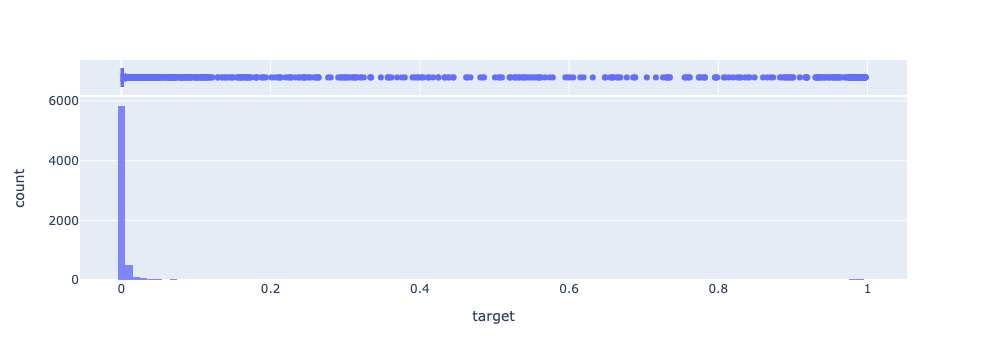

In [59]:
fig = px.histogram(label_df,
                   x='target',
                   width=1000,
                   height=300,
                   opacity=0.8,
                   marginal='box'
            )
fig.update_layout(barmode='overlay')
fig.show()

In [60]:
# とりあえず0.5でラベル付する
label_df['target_label'] = label_df['target'].apply(lambda x: 0 if x <= 0.5 else 1)
label_df.head()

,target,target_label
0,0.002790,0
1,0.000671,0
2,0.000450,0
3,0.000024,0
4,0.000626,0


In [61]:
label_df.query('target >= 0.5').shape

(202, 2)

### testの読み込み

In [62]:
test = pd.read_pickle(FEATURE_DIR_NAME + 'X_test.pkl').reset_index(drop=True)

In [63]:
display(test.head(), test.shape)

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,params0,params1,...,diff_layout_type_mean_fwhm_058,diff_layout_type_mean_num_peak_058,diff_layout_type_mean_fwhm_056,diff_layout_type_mean_num_peak_056,diff_layout_type_mean_fwhm_054,diff_layout_type_mean_num_peak_054,diff_layout_type_mean_fwhm_052,diff_layout_type_mean_num_peak_052,diff_layout_type_mean_fwhm_05,diff_layout_type_mean_num_peak_05
0,000c50e603636dee33c7,fe0fb0a5d966d574c98b.dat,7,2,2,0,184,189.6556,-0.200403,26861.147936,...,6.509127,0.701269,6.262015,0.904268,-4.492755,2.068051,-4.592387,2.232987,-4.576956,2.521338
1,000cba4c60cc418502e8,f1a2e526d2fbeadf20ca.dat,8,2,3,45,188,-256.4733,308.514851,26886.386343,...,-2.953045,0.389247,-3.304576,0.564516,-4.071324,0.753763,-4.284160,0.929032,-4.322945,1.067742
2,0016566cc4324433f909,a9c9daa6e724bda94190.dat,8,1,3,44,135,-291.3372,48.078481,18270.435476,...,6.742133,0.389247,6.288782,0.564516,-7.294066,1.753763,-7.377274,1.929032,-7.355772,2.067742
3,001d350c22eb0a7bb876,02559998e0cd35810729.dat,8,1,3,26,141,-863.9271,179.052601,7646.843080,...,7.539496,-2.610753,7.147700,-3.435484,7.427707,-3.246237,7.319407,-3.070968,8.045107,-4.932258
4,002b39505ff347dca818,fe70889bcb853adf1d05.dat,8,2,2,18,64,737.2772,-7414.835134,77855.568427,...,-2.099215,1.110553,-2.649756,1.184673,-2.843804,1.275126,-3.002983,1.423367,-3.307281,1.575377


(6952, 1397)

In [64]:
# 擬似ラベルを追加
test.loc[:, 'target'] = label_df['target_label']

In [65]:
display(test.head(), test.tail(), test.shape)

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,params0,params1,...,diff_layout_type_mean_num_peak_058,diff_layout_type_mean_fwhm_056,diff_layout_type_mean_num_peak_056,diff_layout_type_mean_fwhm_054,diff_layout_type_mean_num_peak_054,diff_layout_type_mean_fwhm_052,diff_layout_type_mean_num_peak_052,diff_layout_type_mean_fwhm_05,diff_layout_type_mean_num_peak_05,target
0,000c50e603636dee33c7,fe0fb0a5d966d574c98b.dat,7,2,2,0,184,189.6556,-0.200403,26861.147936,...,0.701269,6.262015,0.904268,-4.492755,2.068051,-4.592387,2.232987,-4.576956,2.521338,0
1,000cba4c60cc418502e8,f1a2e526d2fbeadf20ca.dat,8,2,3,45,188,-256.4733,308.514851,26886.386343,...,0.389247,-3.304576,0.564516,-4.071324,0.753763,-4.284160,0.929032,-4.322945,1.067742,0
2,0016566cc4324433f909,a9c9daa6e724bda94190.dat,8,1,3,44,135,-291.3372,48.078481,18270.435476,...,0.389247,6.288782,0.564516,-7.294066,1.753763,-7.377274,1.929032,-7.355772,2.067742,0
3,001d350c22eb0a7bb876,02559998e0cd35810729.dat,8,1,3,26,141,-863.9271,179.052601,7646.843080,...,-2.610753,7.147700,-3.435484,7.427707,-3.246237,7.319407,-3.070968,8.045107,-4.932258,0
4,002b39505ff347dca818,fe70889bcb853adf1d05.dat,8,2,2,18,64,737.2772,-7414.835134,77855.568427,...,1.110553,-2.649756,1.184673,-2.843804,1.275126,-3.002983,1.423367,-3.307281,1.575377,0


,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,params0,params1,...,diff_layout_type_mean_num_peak_058,diff_layout_type_mean_fwhm_056,diff_layout_type_mean_num_peak_056,diff_layout_type_mean_fwhm_054,diff_layout_type_mean_num_peak_054,diff_layout_type_mean_fwhm_052,diff_layout_type_mean_num_peak_052,diff_layout_type_mean_fwhm_05,diff_layout_type_mean_num_peak_05,target
6947,ffe3f18bccea9eca0c4b,a9309e1b871e8089dedb.dat,8,1,2,2,114,220.9971,150.351050,1575.743737,...,-1.298731,5.711838,-0.095732,5.259275,0.068051,2.024232,1.232987,7.786881,-2.478662,0
6948,ffe5dc9b0008f1686fbb,01d6b771f9b18d2c8be5.dat,9,2,2,16,181,702.8404,285.044749,5157.487766,...,-0.298731,6.934305,-1.095732,6.649984,-1.931949,7.061778,-0.767013,-1.404688,0.521338,0
6949,ffe99ef3b8a4ffb5cbfd,6dc212d4616d7e28ac68.dat,8,2,3,25,39,-897.3608,201.594580,1298.787359,...,1.052039,-1.640572,1.165963,-1.941251,1.272855,-2.078661,1.398031,-2.684254,1.562588,0
6950,fff6557194ea0487af92,73db945d1ec8d0d97b51.dat,9,2,4,3,95,-1599.4280,986.415682,1536.973685,...,-37.362755,7.310413,-44.213385,7.281970,-46.050436,6.968304,-50.906887,6.957735,-45.696411,0
6951,ffffb084eeba6fd04e59,d147cb4379e428a08ebf.dat,8,1,2,28,10,1057.1280,48.644496,446.157645,...,3.145608,NaN,3.324910,NaN,3.375451,NaN,3.569194,NaN,3.740072,0


(6952, 1398)

In [66]:
test.query('target >= 0.5').shape

(202, 1398)

camaroさんからの指摘を受けて、validationデータに追加できるように変更

In [67]:
# これを保存
# test.to_pickle(FEATURE_DIR_NAME + 'pseudo_labeling_048_066.pkl')
# test.to_pickle(FEATURE_DIR_NAME + 'pseudo_labeling_lgb_StratifiedKFold_06061135.pkl')
test.to_pickle(FEATURE_DIR_NAME + 'pseudo_labeling_lgb_StratifiedKFold_06061143.pkl')